In [1]:
import pandas as pd



In [2]:
df = pd.read_csv('cleveland.csv', header = None)

In [3]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
df.age[df.age>30]

0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: age, Length: 302, dtype: int64

In [5]:
df.query('age>30')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [72]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [6]:
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [8]:
df['thal'] = df.thal.fillna(df.thal.mean())

df['ca'] = df.ca.fillna(df.ca.mean())

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
################################## data preprocessing

In [11]:
# separate features and target

In [12]:
X = df.iloc[:, :-1].values # features 
y = df.iloc[:, -1].values   # class 

In [13]:
# split dataset to train and test data

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# import for plotting confusion matrix 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#########################################   Logistic Regression  #############################################################


from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

classifier.fit(X_train, y_train) # training 

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# cofusion matrix for testing 

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_pred, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
print(cm)

[[32  9]
 [ 3 17]]


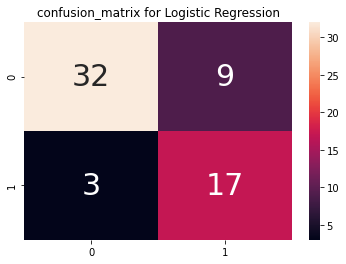

In [19]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.title("confusion_matrix for Logistic Regression")
sns.heatmap(cm, annot = True, annot_kws = {'size':30})

sns.set_style({'xtick.bottom': True})

In [20]:
#########################################  Random Forest  #############################################################


from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10)

classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# cofusion matrix for testing 

from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)


In [21]:
print(cm_test)

[[30  9]
 [ 5 17]]


<AxesSubplot:title={'center':'confusion_matrix for Random Forest'}>

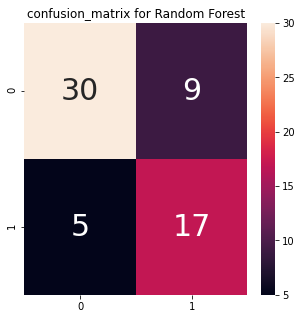

In [22]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.title("confusion_matrix for Random Forest")
sns.heatmap(cm_test, annot = True, annot_kws = {'size':30})